# Support Vector Regression (SVR)

## Importing the libraries

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [49]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
#reshape required for feature scaling as it takes 2d array

In [50]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [51]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [52]:
y = y.reshape(len(y),1)

In [53]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [54]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
X = scalerX.fit_transform(X)
#cant use scaler for both x and y because it is now fitted for x by taking mean and sd so use new scaler for y
scalerY = StandardScaler()
y = scalerY.fit_transform(y)

In [55]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [56]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [57]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
#rbf = radial basis function
regressor.fit(X,y)

C:\Users\Daivik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [58]:
scalerY.inverse_transform(regressor.predict(scalerX.transform([[6.5]])).reshape(-1,1))
#as Y was also scaled therefore we need to use the inverse transform to get teh correct output

array([[170370.0204065]])

## Visualising the SVR results

<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

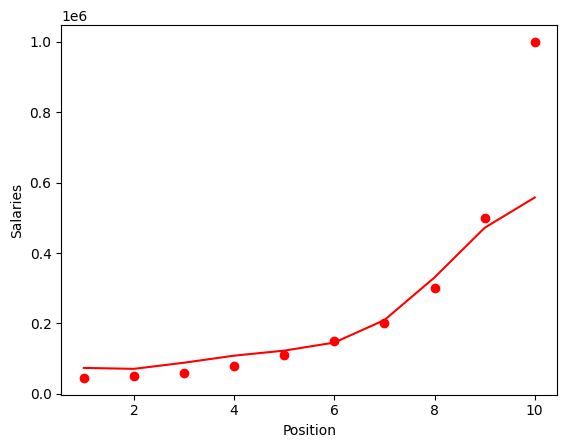

In [59]:
plt.scatter(scalerX.inverse_transform(X),scalerY.inverse_transform(y), color="red")
plt.plot(scalerX.inverse_transform(X),scalerY.inverse_transform(regressor.predict(X).reshape(-1,1)),color = "red")
plt.xlabel("Position")
plt.ylabel("Salaries")
plt.title


## Visualising the SVR results (for higher resolution and smoother curve)

C:\Users\Daivik\AppData\Local\Temp\ipykernel_12224\4032069955.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(scalerX.inverse_transform(X)), max(scalerX.inverse_transform(X)), 0.1)


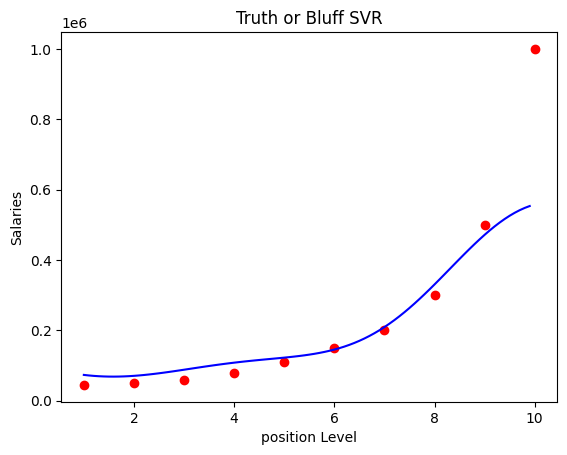

In [65]:
X_grid = np.arange(min(scalerX.inverse_transform(X)), max(scalerX.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(scalerX.inverse_transform(X) , scalerY.inverse_transform(y), color = 'red')
plt.plot(X_grid,scalerY.inverse_transform(regressor.predict(scalerX.transform(X_grid)).reshape(-1,1)) ,color = 'blue')
plt.title('Truth or Bluff SVR')
plt.xlabel('position Level')
plt.ylabel('Salaries')
plt.show()